In [3]:
%load_ext autoreload
%autoreload 2

In [15]:
import os
import sys
sys.path.insert(1, '/scr/gmachi/prospection/K2/src')
from utils import deserialize_model

model_dir = "/scr/gmachi/prospection/K2/notebooks/spatial-bio/outputs/gridsearch_results/k2models"
G_dir = "/scr/biggest/gmachi/datasets/celldive_lung/for_ml/for_prospect/"

In [51]:
valid_models = 0
for model in os.listdir(model_dir):
    model_str = os.path.join(model_dir, model)
    try:
        model = deserialize_model(model_str)
        valid_models += 1
    except EOFError:
        print("skipping b/c corrupted:", model)
        continue

print("valid models:", valid_models, "/", len(os.listdir(model_dir)))

skipping b/c corrupted: k14_r1_alphanan_taunan_lam0.50.model
valid models: 53 / 54


## Run with prospection too

In [52]:
from utils import binarize_graph_otsu, deserialize, serialize
 
def get_binary_G(G_path, k2m):
    G = deserialize(G_path)
    P = k2m.prospect(G)
    visualize_cell_graph(P, key="emb", prospect_flag=True)
    B = binarize_graph_otsu(P)
    visualize_cell_graph(B, key="emb", prospect_flag=True)
    return B
    

In [53]:
dict_path = "/scr/gmachi/prospection/K2/notebooks/spatial-bio/cc_stat_dict.obj"
if os.path.isfile(dict_path):
    cc_stat_dict = deserialize(dict_path)
else:
    cc_stat_dict = {}
    serialize(cc_stat_dict, dict_path)
    

In [54]:
from evaluation import region_prevalence, mean_region_dispersion
import ipdb
from utils import visualize_cell_graph

In [ ]:
label_dict = ""

Skipping b/c already analyzed: k10_r2_alpha10000000000.0000_tau2.00_lamnan.model
0


/scr-ssd/gmachi/miniconda3/envs/kkenv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/scr-ssd/gmachi/miniconda3/envs/kkenv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[0.0] [nan]
Completed: k8_r4_alpha10000000000.0000_tau1.00_lamnan.model


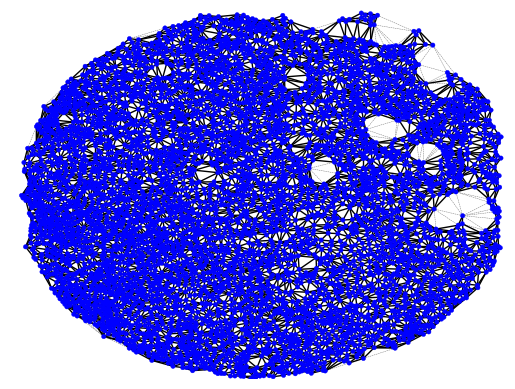

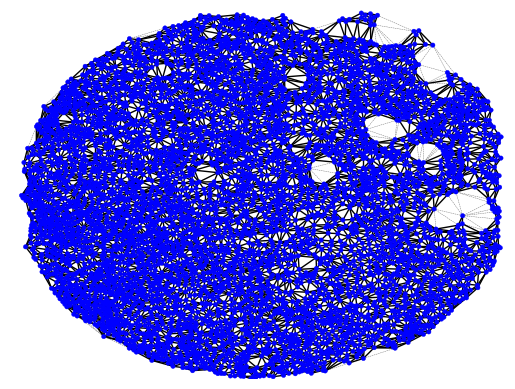

In [57]:
for i,model_str in enumerate(os.listdir(model_dir)):
    model_path = os.path.join(model_dir, model_str)
    
    # check if valid model
    try:
        model = deserialize_model(model_path)
    except EOFError:
        print("Skipping b/c corrupted:", model_str)
        continue
    
    # check if model string in dictionary
    if model_str in cc_stat_dict.keys():
        print("Skipping b/c already analyzed:", model_str)
        continue
    
    # iterate on dataset
    rps, mrds = [], []
    for j,G in enumerate(os.listdir(G_dir)):
        print(j)
        G = os.path.join(G_dir, G)
        B = get_binary_G(G, model)
        rps.append(region_prevalence(B))
        mrds.append(mean_region_dispersion(B))
        print(rps, mrds)
        break
        
    # load stats into dict
    cc_stat_dict[model_str] = [rps, mrds]
    print("Completed:", model_str)
    break
    


In [24]:
cc_stat_dict

{}